In [1]:
import json, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
subdirs = [x[0] for x in os.walk(".")]
savedirs = []
for d in subdirs:
    d = d[2:]
    if "game" in d:
        savedirs.append(d)
rewards = {}
durations = {}
for d in savedirs:
    filename = os.path.join(d, "rewards.json")
    label = d[:-5]
    if os.path.exists(filename):
        with open(filename, "r") as f:
            for line in f:
                entry = json.loads(line)
                rewards[label] = entry
                break
    filename = os.path.join(d, "durations.json")
    label = d[:-5]
    if os.path.exists(filename):
        with open(filename, "r") as f:
            for line in f:
                entry = json.loads(line)
                durations[label] = entry
                break

rmean = {}
for label, rlist in rewards.items():
    rm = []
    window = max(50, int(len(rlist)*0.1))
    for n in range(len(rlist)-window):
        start = n
        end = n+window
        rm.append(np.mean(rlist[start:end]))
    rmean[label] = rm

dmean = {}
for label, dlist in durations.items():
    rm = []
    window = max(50, int(len(dlist)*0.1))
    for n in range(len(dlist)-window):
        start = n
        end = n+window
        rm.append(np.mean(dlist[start:end]))
    dmean[label] = rm

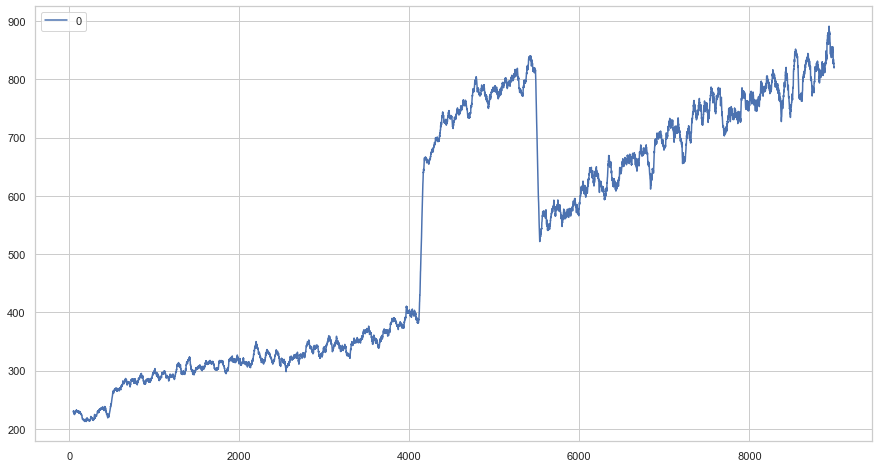

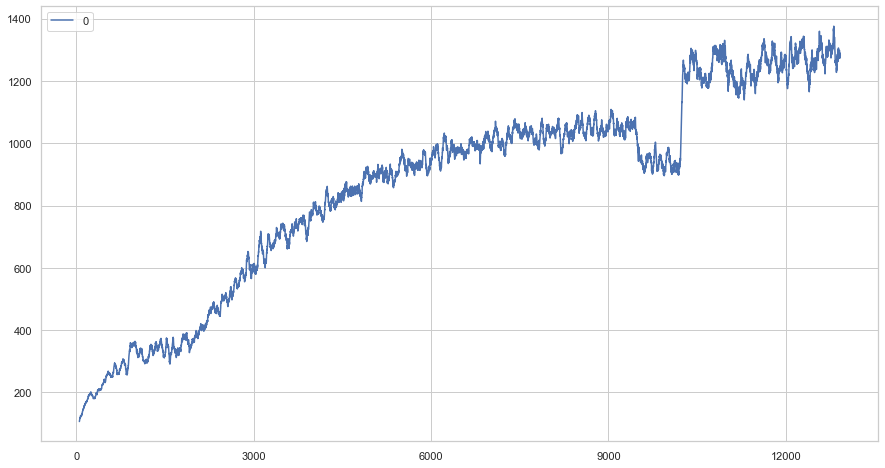

In [97]:
sns.set(style="whitegrid")

for label, rml in rewards.items():
    labels = []
    values = []
    means = []
    for i, v in enumerate(rml):
        labels.append(i)
        values.append(v)
    fig = plt.figure(figsize=(15,8))
    data = pd.DataFrame(values, labels)
    data = data.rolling(50).mean()
    ax = sns.lineplot(data=data, hue="event", style="event", dashes=False, markers=False, linewidth=1.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()

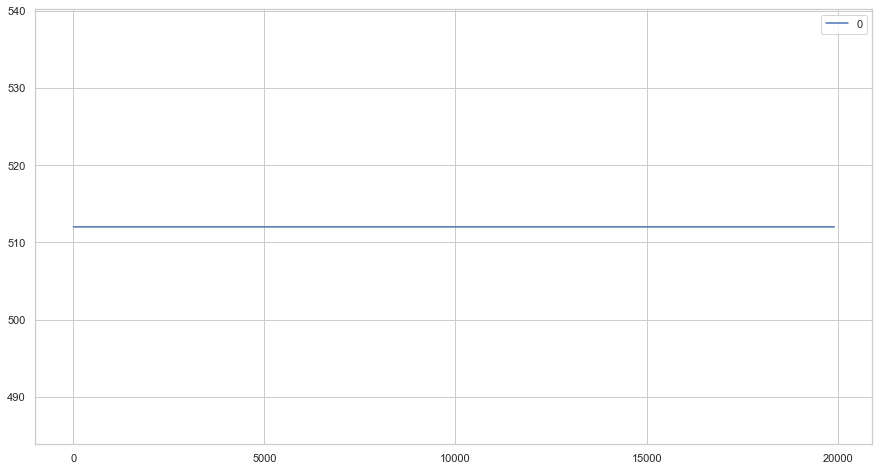

In [39]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(15,8))

for label, rml in dmean.items():
    labels = []
    values = []
    means = []
    for i, v in enumerate(rml):
        labels.append(i)
        values.append(v)
        means.append(rmean[label][i])
    data = pd.DataFrame(values, labels)
    data = data.rolling(7).mean()
    ax = sns.lineplot(data=data, hue="event", style="event", dashes=False, markers=False, linewidth=1.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))